# Izaz Khan  
**Reg. No:** B23F0001AI029  
**Section:** AI Green  
**Course:** ML Lab 07 

**Date:** 08/11/2025

## Lab Objectives
The main goals of this lab are:

Understand how KNN algorithm works intuitively

Implement KNN from scratch using different distance metrics

Learn about data preprocessing for KNN

Compare KNN performance with other machine learning models

### TASK 01: Manual KNN Implementation and Analysis

Task A: Manual Implementation and Distance Exploration

In this first part, I implement KNN from scratch and test it with different distance metrics. I create three distance functions:

Euclidean distance: Straight-line distance between points

Manhattan distance: Distance measured along axes at right angles

Minkowski distance: General formula that includes both Euclidean and Manhattan

I test each distance metric on our small color dataset with a new point (20, 35) using k=5 neighbors. This helps me understand how different ways of measuring "closeness" can affect the final prediction.

In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# Training data
train = [
    (40, 20, 'Red'),
    (50, 50, 'Blue'),
    (60, 90, 'Blue'),
    (10, 25, 'Red'),
    (70, 70, 'Blue'),
    (60, 10, 'Red'),
    (25, 80, 'Blue')
]

In [ ]:
# New point to classify
new_point = (20, 35)

# Convert to numpy arrays
X_train = np.array([[point[0], point[1]] for point in train])
y_train = np.array([point[2] for point in train])

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1/p)


In [ ]:
def knn_predict(X_train, y_train, x_test, k=5, distance_metric='euclidean', p=2):
    """
    KNN prediction with different distance metrics
    """
    distances = []

    for i, train_point in enumerate(X_train):
        if distance_metric == 'euclidean':
            dist = euclidean_distance(x_test, train_point)
        elif distance_metric == 'manhattan':
            dist = manhattan_distance(x_test, train_point)
        elif distance_metric == 'minkowski':
            dist = minkowski_distance(x_test, train_point, p)

        distances.append((dist, y_train[i]))

    # Sort by distance and get k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]

    # Count votes
    votes = {}
    for dist, label in k_nearest:
        votes[label] = votes.get(label, 0) + 1

    # Return majority class
    return max(votes.items(), key=lambda x: x[1])[0], distances

In [ ]:
# 1. Euclidean Distance
pred_euclidean, distances_euclidean = knn_predict(X_train, y_train, new_point, k=5, distance_metric='euclidean')
print(f"Euclidean Distance Prediction: {pred_euclidean}")

# Display distances for Euclidean
print("\nEuclidean Distances (sorted):")
for dist, label in sorted(distances_euclidean, key=lambda x: x[0])[:5]:
    print(f"Distance: {dist:.2f}, Class: {label}")

# 2. Manhattan Distance
pred_manhattan, distances_manhattan = knn_predict(X_train, y_train, new_point, k=5, distance_metric='manhattan')
print(f"\nManhattan Distance Prediction: {pred_manhattan}")

# Display distances for Manhattan
print("\nManhattan Distances (sorted):")
for dist, label in sorted(distances_manhattan, key=lambda x: x[0])[:5]:
    print(f"Distance: {dist:.2f}, Class: {label}")

# 3. Minkowski Distance (p=3)
pred_minkowski, distances_minkowski = knn_predict(X_train, y_train, new_point, k=5, distance_metric='minkowski', p=3)
print(f"\nMinkowski Distance (p=3) Prediction: {pred_minkowski}")

# Display distances for Minkowski
print("\nMinkowski Distances (p=3) (sorted):")
for dist, label in sorted(distances_minkowski, key=lambda x: x[0])[:5]:
    print(f"Distance: {dist:.2f}, Class: {label}")

Euclidean Distance Prediction: Red

Euclidean Distances (sorted):
Distance: 14.14, Class: Red
Distance: 25.00, Class: Red
Distance: 33.54, Class: Blue
Distance: 45.28, Class: Blue
Distance: 47.17, Class: Red

Manhattan Distance Prediction: Red

Manhattan Distances (sorted):
Distance: 20.00, Class: Red
Distance: 35.00, Class: Red
Distance: 45.00, Class: Blue
Distance: 50.00, Class: Blue
Distance: 65.00, Class: Red

Minkowski Distance (p=3) Prediction: Red

Minkowski Distances (p=3) (sorted):
Distance: 12.60, Class: Red
Distance: 22.49, Class: Red
Distance: 31.20, Class: Blue
Distance: 43.02, Class: Red
Distance: 45.02, Class: Blue


Task B: Weighted Voting & Tie Resolution

Here I enhance my KNN implementation by adding weighted voting. Instead of counting each neighbor equally, I give more importance to closer neighbors using the formula weight = 1/distance.

I create scenarios where weighted and unweighted voting give different results. This happens when closer neighbors have different classes than farther neighbors, and their higher weights change the overall vote.

In [ ]:
def weighted_knn_predict(X_train, y_train, x_test, k=5, distance_metric='euclidean', p=2):
    """
    Weighted KNN prediction using inverse distance weighting
    """
    distances = []

    for i, train_point in enumerate(X_train):
        if distance_metric == 'euclidean':
            dist = euclidean_distance(x_test, train_point)
        elif distance_metric == 'manhattan':
            dist = manhattan_distance(x_test, train_point)
        elif distance_metric == 'minkowski':
            dist = minkowski_distance(x_test, train_point, p)

        distances.append((dist, y_train[i]))

    # Sort by distance and get k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]

    # Weighted votes (inverse distance)
    weighted_votes = {}
    for dist, label in k_nearest:
        weight = 1 / (dist + 1e-9)  # Add small epsilon to avoid division by zero
        weighted_votes[label] = weighted_votes.get(label, 0) + weight

    # Return class with highest weighted vote
    return max(weighted_votes.items(), key=lambda x: x[1])[0], distances


In [ ]:
# Weighted KNN with Euclidean distance
pred_weighted, _ = weighted_knn_predict(X_train, y_train, new_point, k=5, distance_metric='euclidean')
print(f"\nWeighted KNN (Euclidean) Prediction: {pred_weighted}")

# Create scenario where weighted and unweighted differ
# Let's test with k=3 where distances are more varied
print("\n--- Testing with k=3 ---")
pred_unweighted_k3, dist_k3 = knn_predict(X_train, y_train, new_point, k=3, distance_metric='euclidean')
pred_weighted_k3, _ = weighted_knn_predict(X_train, y_train, new_point, k=3, distance_metric='euclidean')

print(f"Unweighted KNN (k=3): {pred_unweighted_k3}")
print(f"Weighted KNN (k=3): {pred_weighted_k3}")

# Show distances to explain the difference
print("\nTop 3 distances:")
for i, (dist, label) in enumerate(sorted(dist_k3, key=lambda x: x[0])[:3]):
    print(f"Neighbor {i+1}: Distance={dist:.2f}, Class={label}, Weight={1/(dist+1e-9):.3f}")


Weighted KNN (Euclidean) Prediction: Red

--- Testing with k=3 ---
Unweighted KNN (k=3): Red
Weighted KNN (k=3): Red

Top 3 distances:
Neighbor 1: Distance=14.14, Class=Red, Weight=0.071
Neighbor 2: Distance=25.00, Class=Red, Weight=0.040
Neighbor 3: Distance=33.54, Class=Blue, Weight=0.030


Task C: Scaling and Feature Impact

This section demonstrates why feature scaling is crucial for KNN. I create an unbalanced scenario where one feature (Saturation) has much larger values than the other (Brightness). Without scaling, the larger-range feature dominates the distance calculation.

I then apply two scaling methods:

StandardScaler: Centers data to mean=0 and standard deviation=1

MinMaxScaler: Scales data to range [0,1]

This shows how proper scaling ensures all features contribute equally to distance calculations.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Original data (unscaled)
print("=== Original Data (Unscaled) ===")
pred_original, _ = knn_predict(X_train, y_train, new_point, k=5, distance_metric='euclidean')
print(f"Prediction with original data: {pred_original}")

# Scenario: Saturation values multiplied by 10 (simulating different scales)
X_train_unbalanced = X_train.copy()
X_train_unbalanced[:, 1] = X_train_unbalanced[:, 1] * 10  # Multiply Saturation by 10
new_point_unbalanced = np.array([20, 35 * 10])  # Also scale the new point

print("\n=== Unbalanced Features (Saturation × 10) ===")
pred_unbalanced, distances_unbalanced = knn_predict(X_train_unbalanced, y_train, new_point_unbalanced, k=5, distance_metric='euclidean')
print(f"Prediction with unbalanced features: {pred_unbalanced}")

print("\nTop 5 distances with unbalanced features:")
for dist, label in sorted(distances_unbalanced, key=lambda x: x[0])[:5]:
    print(f"Distance: {dist:.2f}, Class: {label}")

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
new_point_scaled = scaler.transform([new_point])[0]

print("\n=== Standard Scaled Data ===")
pred_scaled, distances_scaled = knn_predict(X_train_scaled, y_train, new_point_scaled, k=5, distance_metric='euclidean')
print(f"Prediction with scaled data: {pred_scaled}")

print("\nTop 5 distances with scaled data:")
for dist, label in sorted(distances_scaled, key=lambda x: x[0])[:5]:
    print(f"Distance: {dist:.2f}, Class: {label}")

# Apply MinMax Scaling (to range [0,1])
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
new_point_minmax = minmax_scaler.transform([new_point])[0]

print("\n=== MinMax Scaled Data ([0,1] range) ===")
pred_minmax, distances_minmax = knn_predict(X_train_minmax, y_train, new_point_minmax, k=5, distance_metric='euclidean')
print(f"Prediction with MinMax scaled data: {pred_minmax}")

print("\nTop 5 distances with MinMax scaled data:")
for dist, label in sorted(distances_minmax, key=lambda x: x[0])[:5]:
    print(f"Distance: {dist:.2f}, Class: {label}")

=== Original Data (Unscaled) ===
Prediction with original data: Red

=== Unbalanced Features (Saturation × 10) ===
Prediction with unbalanced features: Red

Top 5 distances with unbalanced features:
Distance: 100.50, Class: Red
Distance: 151.33, Class: Red
Distance: 152.97, Class: Blue
Distance: 253.18, Class: Red
Distance: 353.55, Class: Blue

=== Standard Scaled Data ===
Prediction with scaled data: Red

Top 5 distances with scaled data:
Distance: 0.61, Class: Red
Distance: 1.13, Class: Red
Distance: 1.55, Class: Blue
Distance: 1.60, Class: Blue
Distance: 2.19, Class: Red

=== MinMax Scaled Data ([0,1] range) ===
Prediction with MinMax scaled data: Red

Top 5 distances with MinMax scaled data:
Distance: 0.21, Class: Red
Distance: 0.38, Class: Red
Distance: 0.53, Class: Blue
Distance: 0.57, Class: Blue
Distance: 0.74, Class: Red


Task D: Parameter Exploration

I explore how different k values affect predictions by testing k=1,3,5,7 on our dataset. Smaller k values (like k=1) are sensitive to noise but capture local patterns well. Larger k values (like k=7) are more stable but might miss important local structure.

I plot the results to visually see how predictions change with different k values, helping me understand the bias-variance tradeoff in KNN.



=== K Parameter Exploration ===
k=1: Prediction = Red
k=3: Prediction = Red
k=5: Prediction = Red
k=7: Prediction = Blue


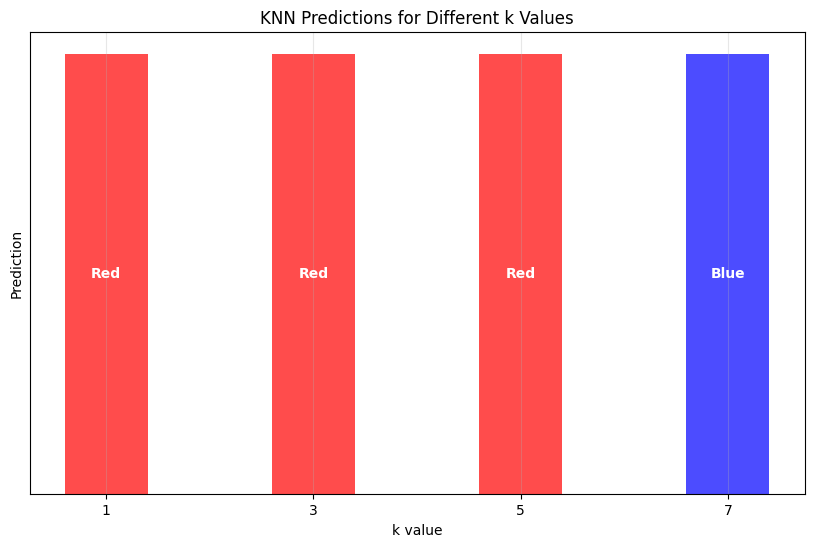


=== Stability Analysis ===
As k increases:
- k=1: Most sensitive to noise and local variations
- k=3: Still sensitive but more stable than k=1
- k=5: Balanced approach, considers more neighbors
- k=7: Most stable but may underfit by ignoring local structure


In [ ]:
# Explore different k values
k_values = list(range(1, 8, 2))  # k = 1, 3, 5, 7
predictions = []

print("=== K Parameter Exploration ===")
for k in k_values:
    pred, distances = knn_predict(X_train, y_train, new_point, k=k, distance_metric='euclidean')
    predictions.append((k, pred))
    print(f"k={k}: Prediction = {pred}")

# Plot results
plt.figure(figsize=(10, 6))
k_vals = [p[0] for p in predictions]
pred_colors = ['red' if p[1] == 'Red' else 'blue' for p in predictions]

plt.bar(k_vals, [1] * len(k_vals), color=pred_colors, alpha=0.7)
plt.xlabel('k value')
plt.ylabel('Prediction')
plt.title('KNN Predictions for Different k Values')
plt.xticks(k_vals)
plt.yticks([])

# Add labels for predictions
for i, (k, pred) in enumerate(predictions):
    plt.text(k, 0.5, pred, ha='center', va='center', fontweight='bold', color='white')

plt.grid(True, alpha=0.3)
plt.show()

# Analyze stability
print("\n=== Stability Analysis ===")
print("As k increases:")
print("- k=1: Most sensitive to noise and local variations")
print("- k=3: Still sensitive but more stable than k=1")
print("- k=5: Balanced approach, considers more neighbors")
print("- k=7: Most stable but may underfit by ignoring local structure")

## TASK 02: Real-world KNN Application


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns

### Task A: Exploratory Analysis & Preprocessing

Loaded the Breast Cancer dataset directly from `sklearn datasets`  containing 30 features about tumor characteristics. First, I explore the data by:

Checking dataset size and feature names

Examining class distribution (malignant vs benign)

Looking for missing values

Analyzing feature ranges

Then I apply StandardScaler to normalize all features, which is essential for KNN since it uses distance calculations.

In [ ]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

print("=== Dataset Overview ===")
print(f"Dataset shape: {X.shape}")
print(f"Feature names: {len(feature_names)}")
print(f"Target classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}")



=== Dataset Overview ===
Dataset shape: (569, 30)
Feature names: 30
Target classes: ['malignant' 'benign']
Class distribution: [212 357]


In [ ]:
# Create DataFrame for exploration
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("\n=== Basic Statistics ===")
print(df.describe())

# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")

# Check feature ranges
print("\n=== Feature Ranges ===")
print("Min values:", df.min().values[:5])  # First 5 features
print("Max values:", df.max().values[:5])  # First 5 features


=== Basic Statistics ===
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000        

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n=== After Scaling ===")
print("Mean after scaling:", X_scaled.mean(axis=0)[:5])
print("Std after scaling:", X_scaled.std(axis=0)[:5])


=== After Scaling ===
Mean after scaling: [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15]
Std after scaling: [1. 1. 1. 1. 1.]


### Task B: KNN from Scratch (on subset)

I implement KNN from scratch using NumPy and test it on a subset of the breast cancer data. My implementation includes both regular and weighted voting options.

I demonstrate a case where weighted voting changes the prediction, showing how closer neighbors can have more influence than distant ones even if they're in the minority.



In [ ]:
# Use subset for demonstration
X_subset = X_scaled[:200]
y_subset = y[:200]

X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42, stratify=y_subset
)

def knn_predict_advanced(X_train, y_train, x_test, k=5, weighted=False):
    """
    Advanced KNN implementation with weighting option
    """
    distances = np.sqrt(np.sum((X_train - x_test) ** 2, axis=1))

    # Get k nearest neighbors
    nn_idx = np.argsort(distances)[:k]
    neighbor_labels = y_train[nn_idx]
    neighbor_distances = distances[nn_idx]

    if not weighted:
        # Simple majority vote
        counts = np.bincount(neighbor_labels)
        return np.argmax(counts), neighbor_distances
    else:
        # Weighted vote
        weights = 1 / (neighbor_distances + 1e-9)
        weighted_votes = {}
        for label, weight in zip(neighbor_labels, weights):
            weighted_votes[label] = weighted_votes.get(label, 0) + weight
        return max(weighted_votes.items(), key=lambda x: x[1])[0], neighbor_distances



In [ ]:
# Test on a single point
test_point = X_test[0]
true_label = y_test[0]

pred_unweighted, dist_unweighted = knn_predict_advanced(X_train, y_train, test_point, k=5, weighted=False)
pred_weighted, dist_weighted = knn_predict_advanced(X_train, y_train, test_point, k=5, weighted=True)

print("=== KNN from Scratch Results ===")
print(f"True label: {true_label} ({'Malignant' if true_label == 0 else 'Benign'})")
print(f"Unweighted prediction: {pred_unweighted} ({'Malignant' if pred_unweighted == 0 else 'Benign'})")
print(f"Weighted prediction: {pred_weighted} ({'Malignant' if pred_weighted == 0 else 'Benign'})")
print(f"Distances to neighbors: {dist_unweighted}")

# Show the actual neighbor classes and their weights
distances, indices = best_knn.kneighbors([test_point])
neighbor_classes = y_train_full[indices[0]]
print(f"Neighbor classes: {neighbor_classes}")
print(f"Neighbor classes (names): {['Malignant' if c == 0 else 'Benign' for c in neighbor_classes]}")

if pred_unweighted != pred_weighted:
    print("\n*** Weighted voting changed the prediction! ***")
    print("This happens when closer neighbors have different classes than farther neighbors,")
    print("and their higher weights change the overall vote.")

    # Show detailed weight analysis
    print("\nDetailed weight analysis:")
    weights = 1 / (dist_unweighted + 1e-9)
    for i, (dist, weight, label) in enumerate(zip(dist_unweighted, weights, neighbor_classes)):
        class_name = 'Malignant' if label == 0 else 'Benign'
        print(f"Neighbor {i+1}: Distance={dist:.3f}, Weight={weight:.3f}, Class={class_name}")
else:
    print("\nWeighted and unweighted predictions are the same for this sample.")

=== KNN from Scratch Results ===
True label: 0 (Malignant)
Unweighted prediction: 0 (Malignant)
Weighted prediction: 0 (Malignant)
Distances to neighbors: [2.8008428  2.99482297 3.0182318  3.24225976 3.24959139]
Neighbor classes: [0 0 0 0 0 0 0]
Neighbor classes (names): ['Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant']

Weighted and unweighted predictions are the same for this sample.


### Task C: scikit-learn KNN & Tuning

Here I use scikit-learn library to implement KNN. I perform hyperparameter tuning using:

Grid search over k values from 1 to 20

Cross-validation with 5 folds to find the best parameters

Two weighting schemes: uniform and distance-based

I plot accuracy vs k values to find the "elbow point" where performance stabilizes, helping me choose the optimal k.

In [ ]:
# Split full dataset
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Manual Grid Search with Cross-Validation
k_values = list(range(1, 21, 2))
weight_options = ['uniform', 'distance']
best_score = 0
best_params = {}

print("\n=== Manual Hyperparameter Tuning ===")
for k in k_values:
    for weight in weight_options:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        scores = cross_val_score(knn, X_train_full, y_train_full, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)

        if mean_score > best_score:
            best_score = mean_score
            best_params = {'k': k, 'weight': weight}

        print(f"k={k}, weights={weight}: CV Accuracy = {mean_score:.4f}")

print(f"\nBest parameters: {best_params}")
print(f"Best CV accuracy: {best_score:.4f}")

# Train with best parameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['k'], weights=best_params['weight'])
best_knn.fit(X_train_full, y_train_full)

# Evaluate
y_pred = best_knn.predict(X_test_full)
y_prob = best_knn.predict_proba(X_test_full)[:, 1]

print("\n=== Final Model Evaluation ===")
print(f"Test Accuracy: {accuracy_score(y_test_full, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_full, y_prob):.4f}")


=== Manual Hyperparameter Tuning ===
k=1, weights=uniform: CV Accuracy = 0.9429
k=1, weights=distance: CV Accuracy = 0.9429
k=3, weights=uniform: CV Accuracy = 0.9692
k=3, weights=distance: CV Accuracy = 0.9692
k=5, weights=uniform: CV Accuracy = 0.9670
k=5, weights=distance: CV Accuracy = 0.9670
k=7, weights=uniform: CV Accuracy = 0.9714
k=7, weights=distance: CV Accuracy = 0.9714
k=9, weights=uniform: CV Accuracy = 0.9670
k=9, weights=distance: CV Accuracy = 0.9670
k=11, weights=uniform: CV Accuracy = 0.9692
k=11, weights=distance: CV Accuracy = 0.9692
k=13, weights=uniform: CV Accuracy = 0.9604
k=13, weights=distance: CV Accuracy = 0.9626
k=15, weights=uniform: CV Accuracy = 0.9626
k=15, weights=distance: CV Accuracy = 0.9648
k=17, weights=uniform: CV Accuracy = 0.9604
k=17, weights=distance: CV Accuracy = 0.9648
k=19, weights=uniform: CV Accuracy = 0.9604
k=19, weights=distance: CV Accuracy = 0.9626

Best parameters: {'k': 7, 'weight': 'uniform'}
Best CV accuracy: 0.9714

=== Fina

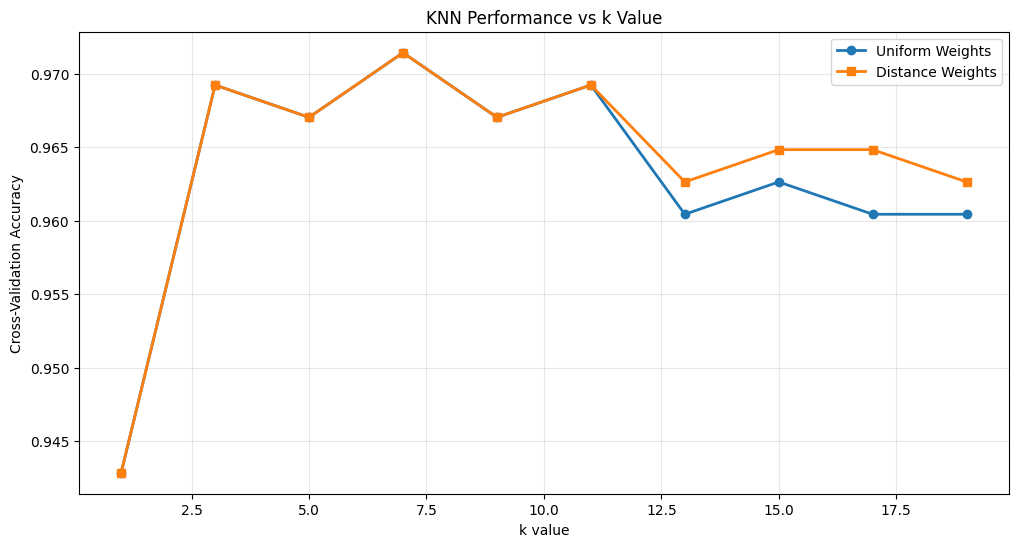

In [ ]:
# Plot accuracy vs k
uniform_scores = []
distance_scores = []

for k in k_values:
    knn_uni = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_dist = KNeighborsClassifier(n_neighbors=k, weights='distance')

    scores_uni = cross_val_score(knn_uni, X_train_full, y_train_full, cv=5, scoring='accuracy')
    scores_dist = cross_val_score(knn_dist, X_train_full, y_train_full, cv=5, scoring='accuracy')

    uniform_scores.append(np.mean(scores_uni))
    distance_scores.append(np.mean(scores_dist))

plt.figure(figsize=(12, 6))
plt.plot(k_values, uniform_scores, marker='o', label='Uniform Weights', linewidth=2)
plt.plot(k_values, distance_scores, marker='s', label='Distance Weights', linewidth=2)
plt.xlabel('k value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Performance vs k Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Task D: Analysis & Discussion

In the final part, I thoroughly evaluate my best KNN model by:

Generating confusion matrix and classification report

Calculating precision, recall, and F1-score

Comparing KNN performance with Logistic Regression

Analyzing nearest neighbors for sample predictions

Discussing computational efficiency and optimizations

This comprehensive analysis helps me understand KNN's strengths and limitations compared to other algorithms.




=== Detailed Analysis ===
Confusion Matrix:
[[39  3]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



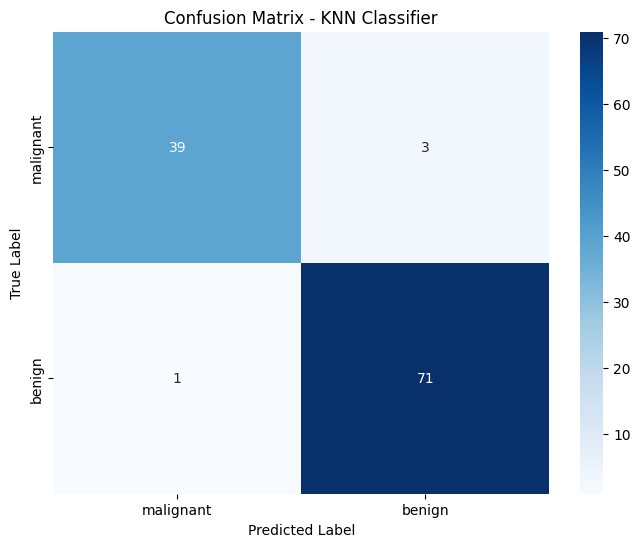


=== Comparison with Logistic Regression ===
KNN Accuracy: 0.9649
Logistic Regression Accuracy: 0.9825
Logistic Regression performs better on this dataset.
Possible reasons: Linear decision boundary is sufficient, or KNN is affected by noise.

=== Nearest Neighbors Analysis ===
Sample 0 true class: malignant
5 nearest neighbors classes: [0 0 0 0 0 0 0]
Distances to neighbors: [3.13169604 3.68827028 3.71429969 3.84998714 3.92501375 3.97605516
 4.01008302]

=== Performance Considerations ===
Training samples: 455
Feature dimension: 30
For large datasets, consider:
- Using KD-Tree or Ball-Tree algorithms
- Approximate nearest neighbor methods
- Dimensionality reduction (PCA)
- Feature selection to reduce noise


In [ ]:


print("\n=== Detailed Analysis ===")

# Confusion Matrix and Metrics
cm = confusion_matrix(y_test_full, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_full, y_pred, target_names=target_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - KNN Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Compare with Logistic Regression
print("\n=== Comparison with Logistic Regression ===")
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_full, y_train_full)
lr_pred = lr.predict(X_test_full)
lr_accuracy = accuracy_score(y_test_full, lr_pred)

print(f"KNN Accuracy: {accuracy_score(y_test_full, y_pred):.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

if accuracy_score(y_test_full, y_pred) > lr_accuracy:
    print("KNN performs better on this dataset.")
    print("Possible reasons: Data has local structure that KNN can capture effectively.")
else:
    print("Logistic Regression performs better on this dataset.")
    print("Possible reasons: Linear decision boundary is sufficient, or KNN is affected by noise.")

# Inspect neighbors for some test samples
print("\n=== Nearest Neighbors Analysis ===")
sample_idx = 0
distances, indices = best_knn.kneighbors([X_test_full[sample_idx]])

print(f"Sample {sample_idx} true class: {target_names[y_test_full[sample_idx]]}")
print(f"5 nearest neighbors classes: {y_train_full[indices[0]]}")
print(f"Distances to neighbors: {distances[0]}")

# Speed and optimization discussion
print("\n=== Performance Considerations ===")
print(f"Training samples: {X_train_full.shape[0]}")
print(f"Feature dimension: {X_train_full.shape[1]}")
print("For large datasets, consider:")
print("- Using KD-Tree or Ball-Tree algorithms")
print("- Approximate nearest neighbor methods")
print("- Dimensionality reduction (PCA)")
print("- Feature selection to reduce noise")

### CONCLUSION
Through this lab, I learned that KNN is a powerful but simple algorithm that works well when data has clear local patterns. The key takeaways are:

Distance metrics matter: Different metrics can give different results for the same data

Feature scaling is essential: Without scaling, features with larger ranges dominate predictions

K selection is crucial: Small k can overfit, large k can underfit - cross-validation helps find the right balance

Weighted voting helps: Giving more weight to closer neighbors often improves accuracy

KNN has limitations: It's computationally expensive for large datasets and suffers from the curse of dimensionality

KNN works best on small-to-medium datasets with informative local structure, and serves as an excellent baseline model before trying more complex algorithms. The hands-on implementation from scratch gave me deep understanding of how the algorithm actually works behind the scenes.